In [62]:
#Name of file: Victoria_Haley_labexercise-5
#Date created: 08/20/2023
#Created by: Victoria Haley
#Purpose of program: To read in the data from the donors_data.csv file and represent the data as Python data 
#structures in a modular way.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import *
import csv
import seaborn as sns

# Introduction

In this report I analyze data in the donors_data.csv file provided by Syracuse University to compare the average gift amounts among certain attributes. Specifically, I make the following comparisons: what is the average gift size among donors in different income groups by region, the average gift size among donors in different income groups by gender, and the average gift size by donors who do or do not own homes by the amount of children that donor has. I begin by first reading in the data from the file and then exploring the structure, descriptive statistics of the attributes, and checking for any missing or duplicated values. Doing so allows me to see the amount of cleaning needed in order to do meaningful analyses. Then, I transformed the dataframe so that unnecessary columns, like "RowId" and "RowId." were removed, as  well as adding a new Regions column that consists of where the donor lives based on the zipconvert_ columns. From there, I updated the no longer needed zipconvert_ columns with blank values, and then removed those columns from the data frame. The program is intended to analyze the donor information in order to get (hopefully meaningful) insights on the donor demographics. In addition to calculations, the comparions are shown in cross-tabular tables that analyze the frequencies of each attribute as well as bar plotsto visualize the differences.

Lab exercise 5 update: Thank you so much for accepting this resubmission. I truly appreciate being able to have another shot at tackling this assignment. I tried to define as many functions as I could, however there were some tasks that I was unable to create functions for as I was having a hard time figuring out how to create functions for really specific/customizable tasks. The best that I was able to do in those cases can be seen towards the end when I created functions to plot my comparisons. They work, but I'm not too proud of them as they seem lazy. I do not mean this as an excuse, however I have no experience using Python outside of class and hope that I can learn how to optimize my programming skills going forward.

In [177]:
#First: Create functions that will be used in the program

#function to open/read the file and create dataframe and prints information of DF
def get_data(file):
    data = pd.read_csv(file)
    df = pd.DataFrame(data.values, columns=data.columns, index=data.index)
    #I'm not sure why this is needed, if not the function returns a pandas.core.Frame.DataFrame object
    return df
#
#   
#Funtion to analyze the data
def analyze_data(data):
    stats = data.describe()
    print('Descriptive Statistics')
    print(stats)
    nulls = data.isnull().sum()
    print('Any null values?')
    print(nulls)
    dups = data.duplicated().values.any()
    print('Any duplicates?')
    print(dups)

In [178]:
#Next, use function to open donors data file
file = 'donors_data.csv'
donors_df = get_data(file)

In [179]:
#Next: Exploring the data to discover what we're working with, as well as any potential things that need to be
#cleaned up.

analyze_data(donors_df)

Descriptive Statistics
            Row Id       Row Id.  zipconvert_2  zipconvert_3  zipconvert_4  \
count  3120.000000   3120.000000   3120.000000   3120.000000   3120.000000   
mean   1560.500000  11615.770833      0.214423      0.185256      0.214423   
std     900.810746   6698.678131      0.410487      0.388568      0.410487   
min       1.000000     17.000000      0.000000      0.000000      0.000000   
25%     780.750000   5820.750000      0.000000      0.000000      0.000000   
50%    1560.500000  11735.500000      0.000000      0.000000      0.000000   
75%    2340.250000  17435.750000      0.000000      0.000000      0.000000   
max    3120.000000  23293.000000      1.000000      1.000000      1.000000   

       zipconvert_5  homeowner dummy      NUMCHLD       INCOME  gender dummy  \
count   3120.000000      3120.000000  3120.000000  3120.000000   3120.000000   
mean       0.384615         0.770192     1.069231     3.893910      0.609295   
std        0.486582         0.4207

In [180]:
#Based on the information above, the following transformations are needed so that the table is easier to read.
# note: I was unable to figure out how to make this modular

#Both RowId columns aren't necessary for the purpose of this assignment
donors_df = donors_df.drop(['Row Id', 'Row Id.'], axis=1)

#Removing the word "dummy" from columns
donors_df = donors_df.rename(columns=lambda col: col.replace(" dummy", ''))

#Combining zipconvert columns into 1 "Regions" column based on highest binary value in the column.
donors_df['Region'] = donors_df.loc[:,'zipconvert_2':'zipconvert_5'].idxmax(axis=1)

#Setting the original zipconvert columns with blank values
donors_df = donors_df.replace({'Region':'zipconvert_'}, {'Region':''}, regex=True)

#Removing no longer needed zipconvert columns
donors_df = donors_df.drop(['zipconvert_2','zipconvert_3','zipconvert_4','zipconvert_5'],axis=1)

#Updated table
donors_df.head()

,homeowner,NUMCHLD,INCOME,gender,WEALTH,HV,Icmed,Icavg,IC15,NUMPROM,RAMNTALL,MAXRAMNT,LASTGIFT,totalmonths,TIMELAG,AVGGIFT,TARGET_B,TARGET_D,Region
0,1.0,1.0,5.0,1.0,9.0,1399.0,637.0,703.0,1.0,74.0,102.0,6.0,5.0,29.0,3.0,4.857143,1.0,5.0,3
1,1.0,1.0,1.0,0.0,7.0,698.0,422.0,463.0,4.0,46.0,94.0,12.0,12.0,34.0,6.0,9.400000,1.0,10.0,2
2,0.0,2.0,5.0,1.0,8.0,828.0,358.0,376.0,13.0,32.0,30.0,10.0,5.0,29.0,7.0,4.285714,1.0,5.0,5
3,1.0,1.0,3.0,0.0,4.0,1471.0,484.0,546.0,4.0,94.0,177.0,10.0,8.0,30.0,3.0,7.080000,0.0,0.0,5
4,1.0,1.0,4.0,0.0,8.0,547.0,386.0,432.0,7.0,20.0,23.0,11.0,11.0,30.0,6.0,7.666667,0.0,0.0,3


# Exploratory Data Analysis and Visualizations
In this section, I dive into the data to analyze the information from the comparisons mentioned above. I begin by splitting the income and averge gift attributes into bins in order to examine the donors in groups based on range. I also examine a cross-tabular table of each comparison to see which attributes more frequently donated  based on the criteria being examined in that comparison. Lastly, I plotted the comparisons so that the results can be quickly interpreted.

In [181]:
#Comparison 1: Average Gift by Income and Gender
#Putting income into 7 bins
bins = [0,1,2,3,4,5,6,7]
income = pd.cut(donors_df['INCOME'],bins)
print(income)
print()
print('Counts of how many donors are in each income bin:')
pd.value_counts(income)

#Most donors (1053/3120) fall in between the 3 and 4 income level range

0       (4, 5]
1       (0, 1]
2       (4, 5]
3       (2, 3]
4       (3, 4]
         ...  
3115    (3, 4]
3116    (1, 2]
3117    (2, 3]
3118    (6, 7]
3119    (4, 5]
Name: INCOME, Length: 3120, dtype: category
Categories (7, interval[int64, right]): [(0, 1] < (1, 2] < (2, 3] < (3, 4] < (4, 5] < (5, 6] < (6, 7]]

Counts of how many donors are in each income bin:


(3, 4]    1053
(4, 5]     535
(1, 2]     468
(2, 3]     296
(0, 1]     282
(5, 6]     246
(6, 7]     240
Name: INCOME, dtype: int64

In [182]:
#Putting AVGGIFT into 5 bins
avgGift = pd.cut(donors_df['AVGGIFT'],5)
print(avgGift)
print()
print('Counts of how many donors are in each average gift bin:')
pd.value_counts(avgGift)

#Most donors (3047/3120) fall in the lowest average gift size range.

0       (2.019, 26.144]
1       (2.019, 26.144]
2       (2.019, 26.144]
3       (2.019, 26.144]
4       (2.019, 26.144]
             ...       
3115    (2.019, 26.144]
3116    (26.144, 50.15]
3117    (2.019, 26.144]
3118    (2.019, 26.144]
3119    (2.019, 26.144]
Name: AVGGIFT, Length: 3120, dtype: category
Categories (5, interval[float64, right]): [(2.019, 26.144] < (26.144, 50.15] < (50.15, 74.156] < (74.156, 98.161] < (98.161, 122.167]]

Counts of how many donors are in each average gift bin:


(2.019, 26.144]      3047
(26.144, 50.15]        61
(50.15, 74.156]         5
(74.156, 98.161]        4
(98.161, 122.167]       3
Name: AVGGIFT, dtype: int64

In [183]:
#Calculating the average gift by income and gender
calc = round(donors_df.groupby(['INCOME','gender'])['AVGGIFT'].mean(),2)
print('Average Gift by Income and Gender')
print(calc)

#Range: 9.18 - 13.98

Average Gift by Income and Gender
INCOME  gender
1.0     0.0       10.05
        1.0        9.18
2.0     0.0       10.54
        1.0        9.45
3.0     0.0       10.68
        1.0        9.26
4.0     0.0       10.98
        1.0       10.29
5.0     0.0       11.42
        1.0       10.67
6.0     0.0       13.00
        1.0       11.49
7.0     0.0       13.98
        1.0       12.67
Name: AVGGIFT, dtype: float64


In [184]:
#Crosstab computing frequencies of the average gift amount by both income and gender
pd.crosstab([donors_df.INCOME,donors_df.gender],avgGift, margins=True)

#Gender 1 donates more frequently than Gender 0

AVGGIFT        (2.019, 26.144]  (26.144, 50.15]  (50.15, 74.156]  \
INCOME gender                                                      
1.0    0.0                 105                2                0   
       1.0                 171                4                0   
2.0    0.0                 164                5                0   
       1.0                 294                3                0   
3.0    0.0                 121                3                0   
       1.0                 171                1                0   
4.0    0.0                 372                9                1   
       1.0                 659               10                1   
5.0    0.0                 212                4                0   
       1.0                 313                4                1   
6.0    0.0                 107                5                0   
       1.0                 130                3                0   
7.0    0.0                 101                4                0   
       1.0                 127                4                2   
All                       3047               61                5   

AVGGIFT        (74.156, 98.161]  (98.161, 122.167]   All  
INCOME gender                                             
1.0    0.0                    0                  0   107  
       1.0                    0                  0   175  
2.0    0.0                    1                  0   170  
       1.0                    1                  0   298  
3.0    0.0                    0                  0   124  
       1.0                    0                  0   172  
4.0    0.0                    0                  0   382  
       1.0                    0                  1   671  
5.0    0.0                    0                  0   216  
       1.0                    0                  1   319  
6.0    0.0                    1                  0   113  
       1.0                    0                  0   133  
7.0    0.0                    1                  1   107  
       1.0                    0                  0   133  
All                           4                  3  3120

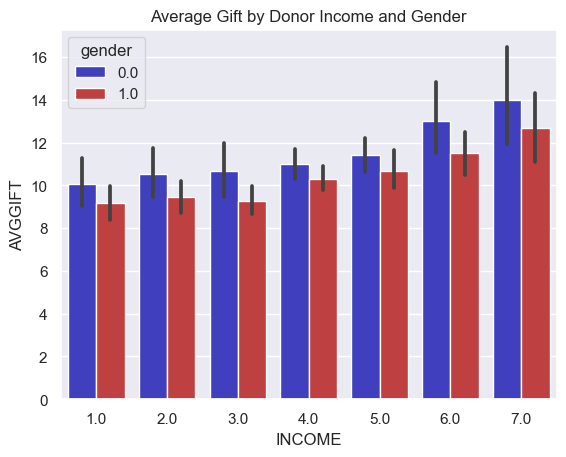

In [185]:
#Defining function that will display plot for comparison 1 when called

def comp1_plot():
    # Initialise a base figure.
    sns.set()
    plt.figure()

    #This is the actual plot
    ax = sns.barplot(data=donors_df,x='INCOME', y='AVGGIFT', hue = 'gender', palette=['blue', 'red'], saturation=0.5)
    ax.set_title('Average Gift by Donor Income and Gender')
    plt.show()

#calling function
comp1_plot()
#Average gift size increases as income level increases (positive correlation)

In [186]:
#Comparison 2: Region and Income by Average Gift
#Calculating the average gift by income and region
calc = round(donors_df.groupby(['INCOME','Region'])['AVGGIFT'].mean(),2)
print('Average Gift by Income and Region')
print(calc)

#Average gift size also increases as income level increases here

Average Gift by Income and Region
INCOME  Region
1.0     2          8.71
        3          8.43
        4          9.98
        5         10.55
2.0     2          9.76
        3          9.05
        4          9.73
        5         10.60
3.0     2         10.29
        3          9.48
        4          9.22
        5         10.20
4.0     2         10.22
        3          9.14
        4         10.65
        5         11.21
5.0     2         11.56
        3         10.80
        4          9.65
        5         11.44
6.0     2         11.30
        3         11.41
        4         12.21
        5         12.71
7.0     2         13.85
        3         13.52
        4         11.46
        5         13.94
Name: AVGGIFT, dtype: float64


In [187]:
#Crosstab computing frequencies of the average gift amount by both region and income
pd.crosstab([donors_df.Regions,donors_df.INCOME],avgGift, margins=True)

#Income level 4 tends to donate more frequently no matter the region

AttributeError: 'DataFrame' object has no attribute 'Regions'

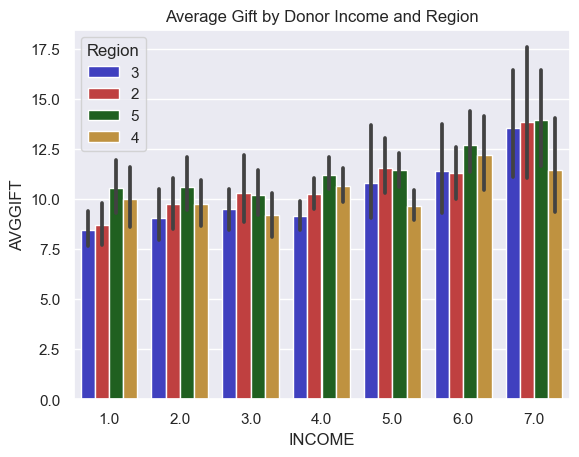

In [188]:
#Defining function that will display plot for comparison 2 when called

def comp2_plot():
    # Initialise a base figure.
    sns.set()
    plt.figure()
    
    #This is the actual plot
    ax2 = sns.barplot(data=donors_df, x="INCOME", y="AVGGIFT", hue="Region", palette=['blue', 'red','green','orange'], saturation=0.5)
    ax2.set_title('Average Gift by Donor Income and Region')
    plt.show()

#calling function
comp2_plot()
#Region 5 and income level 7 tend to donate more on average

In [189]:
#Comparison 3: Average gift by homeowners and number of children
#Calculating the average gift by homeownership and amount of children
calc = round(donors_df.groupby(['homeowner','NUMCHLD'])['AVGGIFT'].mean(),2)
print('Average Gift by Homeownership and Amount of Children')
print(calc)

#There appears to be no correlation between the average gift size depending on homeownership or amount of children
#here.

Average Gift by Homeownership and Amount of Children
homeowner  NUMCHLD
0.0        1.0        10.79
           2.0         9.17
           3.0         9.98
           4.0        11.50
1.0        1.0        10.71
           2.0        10.04
           3.0         9.61
           4.0        10.60
           5.0         6.60
Name: AVGGIFT, dtype: float64


In [190]:
#Crosstab computing frequencies of the average gift amount by whether donor is a homeowner and amount of children
pd.crosstab([donors_df.homeowner,donors_df.NUMCHLD],avgGift, margins=True)

#Donors with 1 child tend to donate more frequently than those with 2-5

AVGGIFT            (2.019, 26.144]  (26.144, 50.15]  (50.15, 74.156]  \
homeowner NUMCHLD                                                      
0.0       1.0                  681               15                0   
          2.0                   11                0                0   
          3.0                    3                0                0   
          4.0                    4                0                0   
1.0       1.0                 2220               44                5   
          2.0                   86                2                0   
          3.0                   28                0                0   
          4.0                   13                0                0   
          5.0                    1                0                0   
All                           3047               61                5   

AVGGIFT            (74.156, 98.161]  (98.161, 122.167]   All  
homeowner NUMCHLD                                             
0.0       1.0                     2                  1   699  
          2.0                     0                  0    11  
          3.0                     0                  0     3  
          4.0                     0                  0     4  
1.0       1.0                     2                  2  2273  
          2.0                     0                  0    88  
          3.0                     0                  0    28  
          4.0                     0                  0    13  
          5.0                     0                  0     1  
All                               4                  3  3120

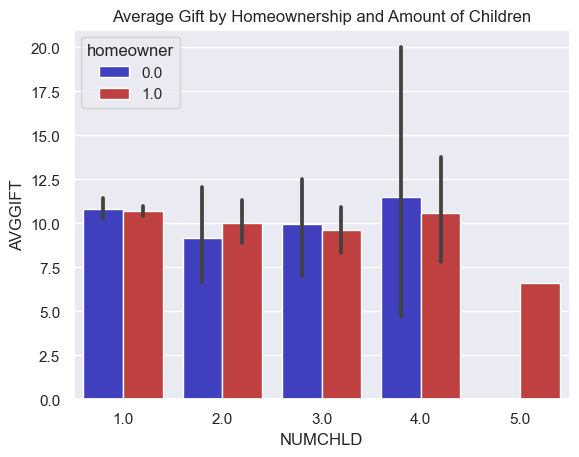

In [191]:
#Defining function that will display plot for comparison 3 when called

def comp3_plot():
    # Initialise a base figure.
    sns.set()
    plt.figure()

    #This is the actual plot
    ax3 = sns.barplot(data=donors_df, x="NUMCHLD", y="AVGGIFT", hue="homeowner", palette=['blue', 'red'], saturation=0.5)
    ax3.set_title('Average Gift by Homeownership and Amount of Children')
    plt.show()

#calling function
comp3_plot()
#The donors with 5 children are all homeowners.

# Conclusion:

Based on the results, the following takeaways can be made:

Comparison 1: Average Gift Size by Donor Income Level and Gender
    
    - Of all income levels, gender 1 usually donates more frequently, however gender 0 usually donates more on 
    average
    
    - As income level increases, so does the average gift size. However, the average gift size is in the lower
        range: 9.18 - 13.98

Comparison 2: Average Gift Size by Donor Income Level and Region
    
    - Income Level 7 and Region 5 donates more on average
    
    - All regions and income levels donate in the lower gift range: 8.43 - 13.94
    
Comparison 3: Average Gift Size by Homeownership and Amount of Children
    
    - There appears to be no correlation between average gift size and homeownership and amount of children,
        however homeowners donated more frequently than non-homeowners and donors with only 1 child donated more
        frequently than donors with 2-5 children.
    
    - Average gift size is also in the lower range among these donors: 6.6 - 11.5
    
As can be seen, there are multiple ways to target donors. Based on the donors analyzed in this report, most (about 98%) tend to donate in the smaller gift size range. At a quick glance, donors in the higher income levels that live in Region 5 are a safe bet. Further investigation into follow-up comparisons would be of benefit.  Ultimately, using any of the information provided by the results of any of the three comparisons made in this report would be helpful in trying to understand the behaviors of future donors based on their demographics.